In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from keras import layers

In [37]:
data_train_path = 'Plant_diseases_dataset'
data_test_path = 'Plant_diseases_dataset'
data_val_path = 'Plant_diseases_dataset'

In [38]:
img_width = 180
img_height = 180

In [39]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 61486 files belonging to 39 classes.


In [40]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_width, img_height),
    shuffle=True,
    batch_size=32,
    validation_split=False)

Found 61486 files belonging to 39 classes.


In [41]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_width, img_height),
    shuffle=True,
    batch_size=32,
    validation_split=False
)

Found 61486 files belonging to 39 classes.


In [64]:
data_category = data_train.class_names
val_data_category = data_val.class_names
test_data_category = data_test.class_names
data_category

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Background_without_leaves',
 'Blueberry___healthy',
 'Cherry___Powdery_mildew',
 'Cherry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn___Common_rust',
 'Corn___Northern_Leaf_Blight',
 'Corn___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot'

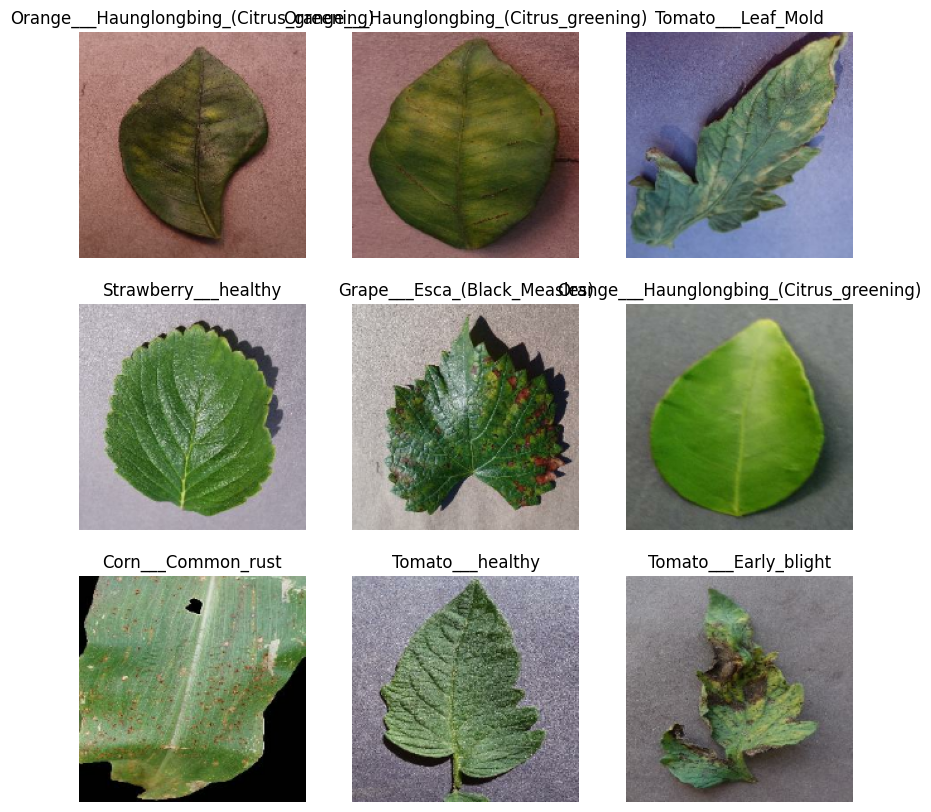

In [43]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_category[labels[i]])
        plt.axis('off')

In [ ]:
from keras import Sequential

data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])

In [45]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data_category), activation='softmax')
])

In [46]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [47]:
epochs_size = 25

history = model.fit(
    data_train,
    validation_data=data_val,
    epochs=epochs_size
)

Epoch 1/25


c:\Users\User\anaconda3\envs\CNNs_fruits\lib\site-packages\keras\src\backend\tensorflow\nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1922/1922 ━━━━━━━━━━━━━━━━━━━━ 990s 514ms/step - accuracy: 0.5084 - loss: 1.7742 - val_accuracy: 0.7842 - val_loss: 0.7187
Epoch 2/25
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 574s 299ms/step - accuracy: 0.8487 - loss: 0.4812 - val_accuracy: 0.8715 - val_loss: 0.4087
Epoch 3/25
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 575s 299ms/step - accuracy: 0.8903 - loss: 0.3380 - val_accuracy: 0.8595 - val_loss: 0.4523
Epoch 4/25
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 575s 299ms/step - accuracy: 0.9095 - loss: 0.2726 - val_accuracy: 0.9039 - val_loss: 0.2930
Epoch 5/25
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 576s 300ms/step - accuracy: 0.9200 - loss: 0.2430 - val_accuracy: 0.9440 - val_loss: 0.1703
Epoch 6/25
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 576s 300ms/step - accuracy: 0.9312 - loss: 0.2078 - val_accuracy: 0.9332 - val_loss: 0.1986
Epoch 7/25
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 576s 300ms/step - accuracy: 0.9367 - loss: 0.1913 - val_accuracy: 0.9472 - val_loss: 0.1628
Epoch 8/25
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 577s 300ms/step - accuracy: 0.9

Text(0.5, 1.0, 'Loss')

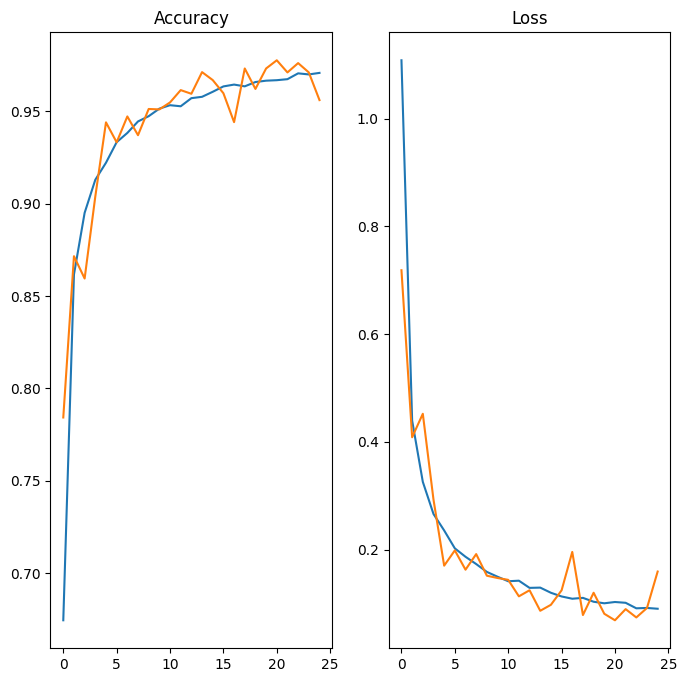

In [48]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, 
         history.history['accuracy'], 
         label='Training Accuracy')
plt.plot(epochs_range, 
         history.history['val_accuracy'], 
         label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, 
         history.history['loss'], 
         label='Training Loss')
plt.plot(epochs_range, 
         history.history['val_loss'], 
         label='Validation Loss')
plt.title('Loss')

In [59]:
image = 'Plants-leaves-images/1.png'
image = tf.keras.utils.load_img(
    image, 
    target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr, 0)

In [60]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [61]:
score = tf.nn.softmax(predict[0])

In [62]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_category[np.argmax(score)], np.max(score)*100))

Veg/Fruit in image is Apple___Black_rot with accuracy of 6.68


In [63]:
model.save('PlantsLeaves_classify.keras')